## Feature Selection

The feature selection methods used in this work are: 
 - The Variance Threshold method, to remove zero-variance features: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html
 
 - The Mutual Information Score, to select the first 10 features: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html
 
 - The Feature Importance Score calculated by the RandomForest algorithm, to select 2 potentially important features missed by the previous method: https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

In [1]:
# importing packages
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold, mutual_info_regression
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading csv file and selecting relevant columns
df = pd.read_csv('dataset_features.csv')
excluded = ["Tc", "compound", "composition",'elements']
X = df.drop(excluded, axis=1)
y = df['Tc'].values

In [3]:
# removing zero-variance features using the variance threshold method
var_thr = VarianceThreshold(threshold = 0)
var_thr.fit_transform(X)

concol = [column for column in X.columns if column not in X.columns[var_thr.get_support()]]

print(f'Number of zero-variance features : {len(concol)}\n')
for features in concol:
    print(features)

Number of zero-variance features : 19

MagpieData minimum Row
MagpieData maximum NsValence
MagpieData minimum NpValence
MagpieData minimum NdValence
MagpieData minimum NfValence
MagpieData mode NfValence
MagpieData minimum NsUnfilled
MagpieData minimum NpUnfilled
MagpieData minimum NdUnfilled
MagpieData minimum NfUnfilled
MagpieData maximum NfUnfilled
MagpieData range NfUnfilled
MagpieData mean NfUnfilled
MagpieData avg_dev NfUnfilled
MagpieData mode NfUnfilled
MagpieData minimum GSbandgap
MagpieData minimum GSmagmom
MagpieData mode GSmagmom
MagpieData minimum SpaceGroupNumber


In [4]:
# selecting the top 10 features with the highest mutual information score
coeff_df =pd.DataFrame(mutual_info_regression(X, y, random_state=4).reshape(-1, 1),
                         columns=['Coefficient'], index=X.columns)
X_mi = X[coeff_df.sort_values(by='Coefficient',ascending=False)[:10].index]
coeff_df.sort_values(by='Coefficient',ascending=False)[:12]

,Coefficient
MagpieData range MendeleevNumber,0.630043
MagpieData avg_dev CovalentRadius,0.593411
a,0.573869
MagpieData mean GSvolume_pa,0.559791
MagpieData range Electronegativity,0.544154
MagpieData avg_dev Number,0.498249
MagpieData mean CovalentRadius,0.493282
MagpieData avg_dev Row,0.487205
MagpieData mean Number,0.477378
MagpieData range CovalentRadius,0.459039


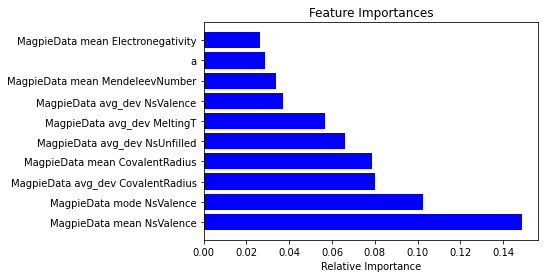

In [5]:
# training a randomforest regressor to use the feature importance scores
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
model = RandomForestRegressor(n_estimators=50, random_state=1)
model.fit(X_train, y_train)
importances = model.feature_importances_
indices = np.argsort(-importances)[:10]

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()